In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

norman = pd.read_csv('../../results/norman.csv', index_col=0).assign(Dataset='Norman').drop(['split'], axis=1)
norman = norman[norman.subgroup != 'single']
norman = norman.melt(id_vars=['Method', 'subgroup'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
norman['Method'] = norman['Method'].replace('scOracle', 'Scouter')
norman['Method'] = norman['Method'].replace('Biolord', 'biolord')
norman['Method'] = norman['Method'].replace('Gears', 'GEARS')
norman['Method'] = pd.Categorical(norman['Method'], categories=['Scouter', 'biolord', 'GEARS'], ordered=True)

# Define a custom color palette
custom_palette = {
    'Scouter': 'mediumseagreen',
    'biolord': 'lightskyblue',  
    'GEARS': 'lightsalmon'
}

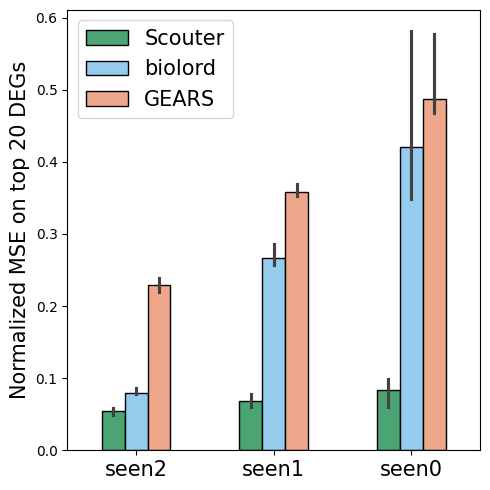

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
subgroup
seen0    0.802494
seen1    0.741175
seen2    0.320921
dtype: float64
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
subgroup
seen0    0.829312
seen1    0.807933
seen2    0.764574
dtype: float64


In [2]:
NMSE = norman[norman.Metric=='NormMSE']
plt.figure(figsize=(5,5), dpi=100)
barplot = sns.barplot(data=NMSE, x="subgroup", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Normalized MSE on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_MSE = NMSE.groupby(['subgroup', 'Method'], observed=False)['Value'].median().reset_index()
pivot_MSE = median_MSE.pivot(index='subgroup', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
print((pivot_MSE['biolord'] - pivot_MSE['Scouter'])/pivot_MSE['biolord'])
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
print((pivot_MSE['GEARS'] - pivot_MSE['Scouter'])/pivot_MSE['GEARS'])

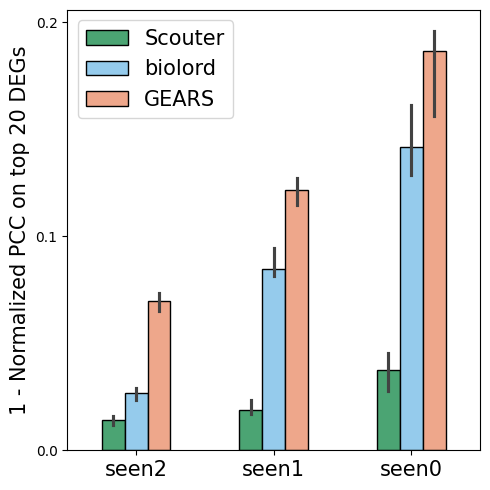

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
subgroup
seen0    0.734776
seen1    0.780819
seen2    0.471697
dtype: float64
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
subgroup
seen0    0.798672
seen1    0.847116
seen2    0.797397
dtype: float64


In [3]:
NPCC = norman[norman.Metric=='Pearson']
NPCC.loc[:, 'Value'] = 1 - NPCC['Value']
plt.figure(figsize=(5,5), dpi=100)
barplot = sns.barplot(data=NPCC, x="subgroup", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(fontsize=15)
plt.xlabel('')
plt.yticks([0.0, 0.1, 0.2])
plt.ylabel('1 - Normalized PCC on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_PCC = NPCC.groupby(['subgroup', 'Method'], observed=False)['Value'].median().reset_index()
pivot_PCC = median_PCC.pivot(index='subgroup', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
print((pivot_PCC['biolord'] - pivot_PCC['Scouter'])/pivot_PCC['biolord'])
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
print((pivot_PCC['GEARS'] - pivot_PCC['Scouter'])/pivot_PCC['GEARS'])